In [ ]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset
df = pd.read_csv('Walmart.csv')

# Dictionary to store data frames for each store
store_dataframes = {}

# Loop to process each store
for store_number in range(1, 45):

    store_df = df[df['Store'] == store_number].copy()
    duplicates = store_df.duplicated().sum()
    if duplicates > 0:
        print(f"Store {store_number}: {duplicates} duplicate rows found.")

    nulls = store_df.isnull().sum().sum()
    if nulls > 0:
        print(f"Store {store_number}: {nulls} null values found.")

    # Display descriptive statistics
    print(f"\nStore {store_number} - Descriptive Statistics:")
    print(store_df.describe())

    # Display the first few rows
    print(f"\nStore {store_number} - First Few Rows:")
    print(store_df.head())

    # Store the data frame in the dictionary
    store_dataframes[store_number] = store_df


In [ ]:
store1 = store_dataframes[1]

In [ ]:
store1=store1.drop('Store', axis = 1)

In [ ]:
store1['Date'] = pd.to_datetime(store1['Date'])

In [ ]:
store1 = store1.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y',
                                'Holiday_Flag':'Holiday_Flag',
                       'Temperature':'Temperature','Fuel_Price':'Fuel_Price',
                       'CPI': 'CPI', 'Unemployment': 'Unemployment'})

<Axes: >

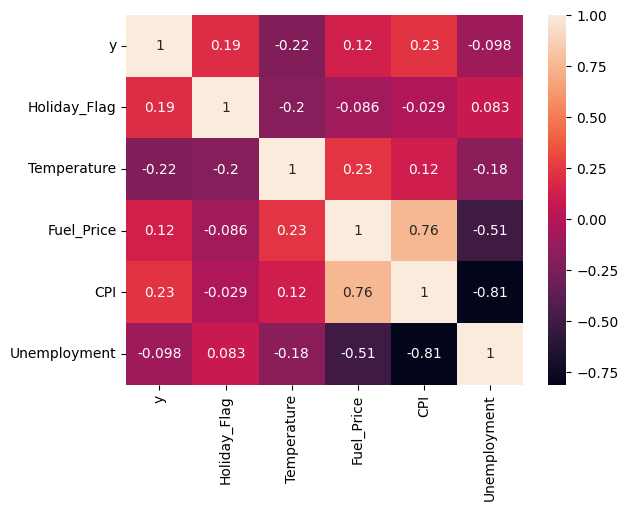

In [ ]:
sns.heatmap(store1.corr(), annot=True)

In [ ]:
data = store1.copy()

In [ ]:

split_index = int(len(data) * 0.8)

train_data = data[:split_index]
test_data = data[split_index:]

In [ ]:
train_data = data.drop('Fuel_Price', axis=1)


In [ ]:
from prophet import Prophet

In [ ]:
prophet_model = Prophet()
prophet_model.add_regressor("Holiday_Flag")
prophet_model.add_regressor("Temperature")
prophet_model.add_regressor("CPI")
prophet_model.add_regressor("Unemployment")
prophet_model.fit(train_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplfdos1c6/m4ee4cjb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplfdos1c6/dtj2lc0_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91659', 'data', 'file=/tmp/tmplfdos1c6/m4ee4cjb.json', 'init=/tmp/tmplfdos1c6/dtj2lc0_.json', 'output', 'file=/tmp/tmplfdos1c6/prophet_modelw63czigk/prophet_model-20230706082536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:25:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:25:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
test_data_Store1 = data.drop('y', axis=1)
test_data_Store1 = data.drop('Fuel_Price', axis=1)

test_data_Store1

,ds,y,Holiday_Flag,Temperature,CPI,Unemployment
0,2010-05-02,1643690.90,0,42.31,211.096358,8.106
1,2010-12-02,1641957.44,1,38.51,211.242170,8.106
2,2010-02-19,1611968.17,0,39.93,211.289143,8.106
3,2010-02-26,1409727.59,0,46.63,211.319643,8.106
4,2010-05-03,1554806.68,0,46.50,211.350143,8.106
...,...,...,...,...,...,...
138,2012-09-28,1437059.26,0,76.08,222.981658,6.908
139,2012-05-10,1670785.97,0,68.55,223.181477,6.573
140,2012-12-10,1573072.81,0,62.99,223.381296,6.573
141,2012-10-19,1508068.77,0,67.97,223.425723,6.573


In [ ]:
#m.predict()
forecast = prophet_model.predict(test_data_Store1)

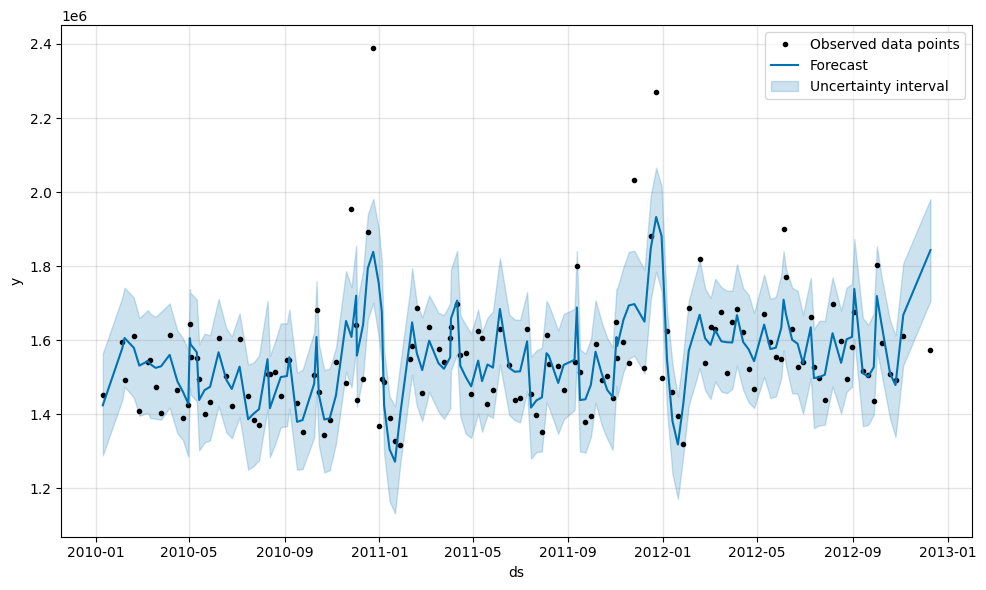

In [ ]:
store1_forecast = prophet_model.plot(forecast, include_legend=True, )

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Extract the actual values from the testing data
actual_values = test_data['y'].values

# Extract the forecasted values
forecast_values = forecast['yhat'].values[-len(test_data):]

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mean_squared_error(actual_values, forecast_values))

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 152682.92178652994
Root Mean Squared Error (RMSE): 174993.15300256322


In [ ]:
forecast_values = forecast['yhat'].values[-len(test_data):]
forecast_values

array([1738363.17234263, 1767421.53761547, 1760135.80759738,
       1778128.77716698, 1770348.56973545, 1785399.03781434,
       1774988.65295088, 1747920.21046363, 1706693.28177534,
       1691340.98627828, 1707010.43894237, 1697222.3842205 ,
       1689994.74630631, 1695162.12964378, 1717925.24499205,
       1767608.23184145, 1762534.73923288, 1716085.82911216,
       1644717.92677628, 1628282.77645401, 1665847.65239727,
       1705698.70620233, 1669766.18056192, 1601508.2926069 ,
       1579730.01374739, 1655855.50169899, 1774846.42449344,
       1818725.41634622, 1797580.60850334])

In [ ]:
actual_values

array([1621031.7 , 1521577.87, 1468928.37, 1684519.99, 1611096.05,
       1595901.87, 1555444.55, 1624477.58, 1697230.96, 1630607.  ,
       1527845.81, 1540421.49, 1769854.16, 1527014.04, 1497954.76,
       1439123.71, 1631135.79, 1592409.97, 1597868.05, 1494122.38,
       1582083.4 , 1661767.33, 1517428.87, 1506126.06, 1437059.26,
       1670785.97, 1573072.81, 1508068.77, 1493659.74])

## Generating Random Values for **Forecasting**

---

---

In [ ]:
import numpy as np

def generate_future_values_Flag(previous_values, num_periods, mean, std_dev):
    # Generate random values based on previous values
    last_value = previous_values[-1]
    random_values = np.random.normal(mean, std_dev, num_periods)
    future_values = last_value + np.cumsum(random_values)

    # Assign 1 to negative values, 0 to non-negative values FOR HOLIDAY FLAG
    future_values = np.where(future_values < 0, 1, 0)

    return future_values


In [ ]:
import numpy as np

def generate_future_values(previous_values, num_periods, mean, std_dev):
    # Calculate the mean and standard deviation of previous values
    prev_mean = np.mean(previous_values)
    prev_std = np.std(previous_values)

    # Generate random values based on the statistical properties of previous values
    random_values = np.random.normal((mean - prev_mean), (std_dev / prev_std),
                                     num_periods)
    future_values = previous_values[-1] + np.cumsum(random_values)

    return future_values


In [ ]:
fut_holiday_flag=generate_future_values_Flag(store1['Holiday_Flag'].values, 50,
                                         0.06993006993006994,
                                         0.2559255407326332)

temp_mean=store1['Temperature'].mean()
temp_std=store1['Temperature'].std()

fut_temp = generate_future_values(store1['Temperature'].values, 50,
                                         temp_mean, temp_std)

fp_mean = store1['Fuel_Price'].mean()
fp_std = store1['Fuel_Price'].std()

fut_Fuel_Price = generate_future_values(store1['Fuel_Price'].values, 50,
                                         fp_mean, fp_std)


CPI_mean = store1['CPI'].mean()
CPI_std = store1['CPI'].std()

fut_CPI = generate_future_values(store1['CPI'].values, 50,
                                         CPI_mean, CPI_std)


Unemployment_mean = store1['Unemployment'].mean()
Unemployment_std = store1['Unemployment'].std()

fut_Unemployment = generate_future_values(store1['Unemployment'].values, 50,
                                         Unemployment_mean, Unemployment_std)


In [ ]:
fut_Unemployment

array([ 6.34512071,  5.95712031,  5.84488872,  5.38150221,  6.04184006,
        6.53746609,  4.77314091,  4.25309335,  5.35486122,  4.6950068 ,
        4.27699548,  6.07421511,  5.29105798,  6.88845544,  7.69748827,
        7.84109082,  6.88570948,  7.02348538,  7.25876389,  8.83783397,
        7.87855455,  8.99108892,  7.87377732,  6.02880179,  5.12074372,
        3.34381648,  3.43067986,  0.94486351,  0.51364786,  0.21331085,
        0.67658826, -0.21735104,  0.79862595,  1.60411304,  0.62982557,
       -0.69369586, -0.1074657 ,  0.26193904,  0.91912295,  1.84761376,
        2.81134589,  3.39120656,  4.83728326,  4.27568313,  3.18818079,
        2.92775592,  2.96317388,  4.44204278,  4.36518744,  4.22561363])

In [ ]:
future = prophet_model.make_future_dataframe(periods=50, freq='W')
future = future.tail(50).reset_index()

fut_Unemployment = np.clip(fut_Unemployment, 6.573, 8.106)

# Create individual dataframes for the future values
future_holiday_flag = pd.DataFrame({'Holiday_Flag': fut_holiday_flag})
future_temp = pd.DataFrame({'Temperature': fut_temp})
future_fuel_price = pd.DataFrame({'Fuel_Price': fut_Fuel_Price})
future_cpi = pd.DataFrame({'CPI': fut_CPI})
future_unemployment = pd.DataFrame({'Unemployment': fut_Unemployment})

# Concatenate the individual dataframes horizontally
future_data = pd.concat([future, future_holiday_flag, future_temp,
                         future_fuel_price, future_cpi,
                         future_unemployment], axis=1)

In [ ]:
future_data

In [ ]:
future = prophet_model.make_future_dataframe(periods=50, freq='W')

In [ ]:
future = future.tail(50).reset_index()

array([6.573     , 6.573     , 6.573     , 6.573     , 6.573     ,
       6.573     , 6.573     , 6.573     , 6.573     , 6.573     ,
       6.573     , 6.573     , 6.573     , 6.88845544, 7.69748827,
       7.84109082, 6.88570948, 7.02348538, 7.25876389, 8.106     ,
       7.87855455, 8.106     , 7.87377732, 6.573     , 6.573     ,
       6.573     , 6.573     , 6.573     , 6.573     , 6.573     ,
       6.573     , 6.573     , 6.573     , 6.573     , 6.573     ,
       6.573     , 6.573     , 6.573     , 6.573     , 6.573     ,
       6.573     , 6.573     , 6.573     , 6.573     , 6.573     ,
       6.573     , 6.573     , 6.573     , 6.573     , 6.573     ])

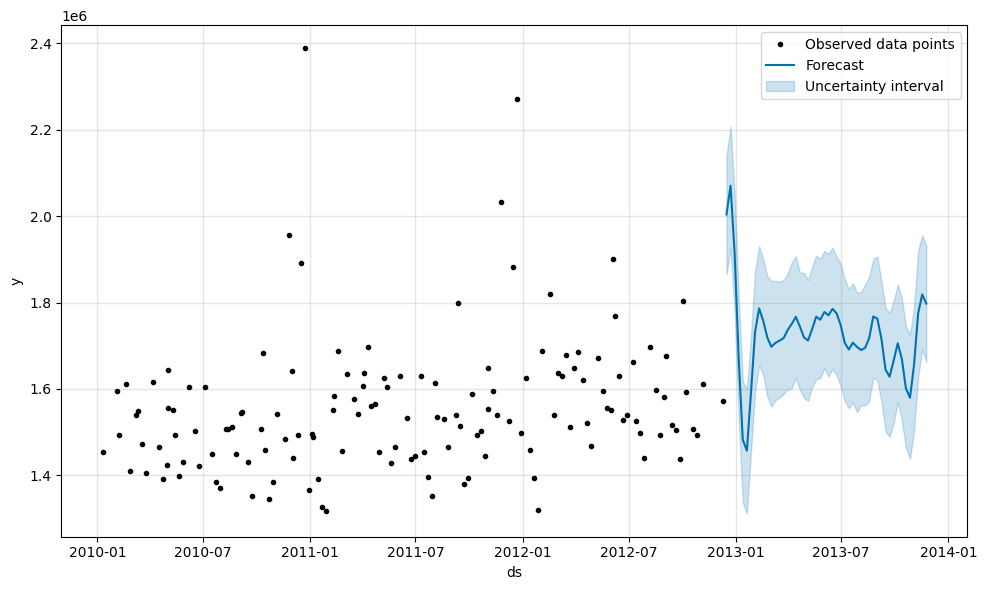

In [ ]:
#m.predict()
forecast = prophet_model.predict(future_data)
store1_forecast = prophet_model.plot(forecast, include_legend=True, )

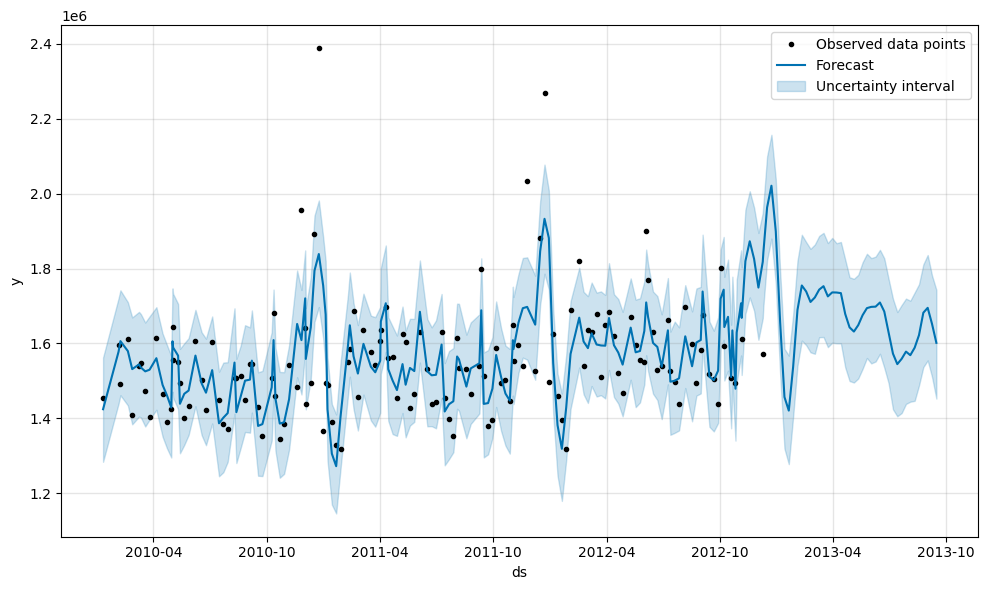

In [ ]:
#m.predict()
forecast = prophet_model.predict(test)
store1_forecast = prophet_model.plot(forecast, include_legend=True, )

In [ ]:
test=pd.concat([store1, future_data])

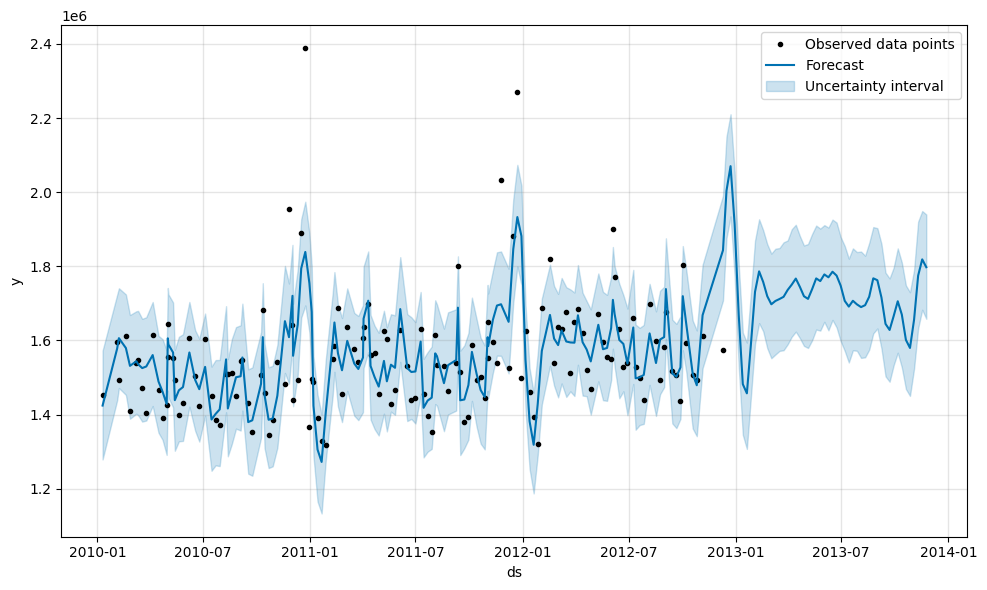

In [ ]:

forecast = prophet_model.predict(test)
store1_forecast = prophet_model.plot(forecast, include_legend=True, )
